In [8]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt


## Step :01 Load Data

In [9]:
#Loading the heart_disease_uci dataset
train_data = pd.read_csv('..\data\heart_disease\data_train.csv')
test_data = pd.read_csv('..\data\heart_disease\data_test.csv')
train_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,881,62,1.0,3.0,0.0,146.12,170.00,0.0,2.0,120.00,1.0,3.000,0.0,0.0,2.0,1
1,458,54,1.0,1.0,2.0,150.00,216.98,0.0,1.0,122.00,0.0,0.000,2.0,0.0,2.0,0
2,798,51,1.0,3.0,2.0,134.86,339.00,0.0,1.0,132.41,1.0,2.943,1.0,0.0,2.0,1
3,26,50,0.0,0.0,2.0,120.00,219.00,0.0,1.0,158.00,0.0,1.600,1.0,0.0,1.0,0
4,85,52,1.0,0.0,1.0,120.00,325.00,0.0,1.0,172.00,0.0,0.200,2.0,0.0,1.0,0


In [10]:
train_data.shape

(736, 16)

In [11]:
#Splitting the data into features and target
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]

X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]
X_train.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,881,62,1.0,3.0,0.0,146.12,170.00,0.0,2.0,120.00,1.0,3.000,0.0,0.0,2.0
1,458,54,1.0,1.0,2.0,150.00,216.98,0.0,1.0,122.00,0.0,0.000,2.0,0.0,2.0
2,798,51,1.0,3.0,2.0,134.86,339.00,0.0,1.0,132.41,1.0,2.943,1.0,0.0,2.0
3,26,50,0.0,0.0,2.0,120.00,219.00,0.0,1.0,158.00,0.0,1.600,1.0,0.0,1.0
4,85,52,1.0,0.0,1.0,120.00,325.00,0.0,1.0,172.00,0.0,0.200,2.0,0.0,1.0


# Scaling

Standard Scaler

This method transforms values to follow a standard normal distribution with a mean of 0 and a standard deviation of 1.
z = x - mean / standard deviation

In [12]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [13]:
#removing nan values and infinetes
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
y_train = np.nan_to_num(y_train)
y_test = np.nan_to_num(y_test)



## 5. Modeling
- Using Grid search cv to find and fitthe best model

In [14]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

# Define parameter grids for each model
param_grid = [
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30]
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [None, 10, 20, 30]
    },
    {
        'model': [XGBClassifier()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 6, 9]
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7, 9]
    }
]

# Create a pipeline
pipeline = Pipeline([
    ('model', RandomForestClassifier())
])

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
print("Best model and parameters:", grid_search.best_params_)

# Predict using the best model
y_pred = best_model.predict(X_test)

#creating a csv file for the best model's prediction as traditional.csv
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])
y_pred.to_csv('results/traditional.csv', index=False)

# Checking the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model is:", accuracy)

# Checking the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix is:", conf_matrix)

Best model and parameters: {'model': RandomForestClassifier(), 'model__max_depth': 10, 'model__n_estimators': 100}
Accuracy of the best model is: 0.907608695652174
Confusion matrix is: [[ 67   8]
 [  9 100]]


# Findings
- Best model : Randomforestclassifier with depth 20 and 200 estimators

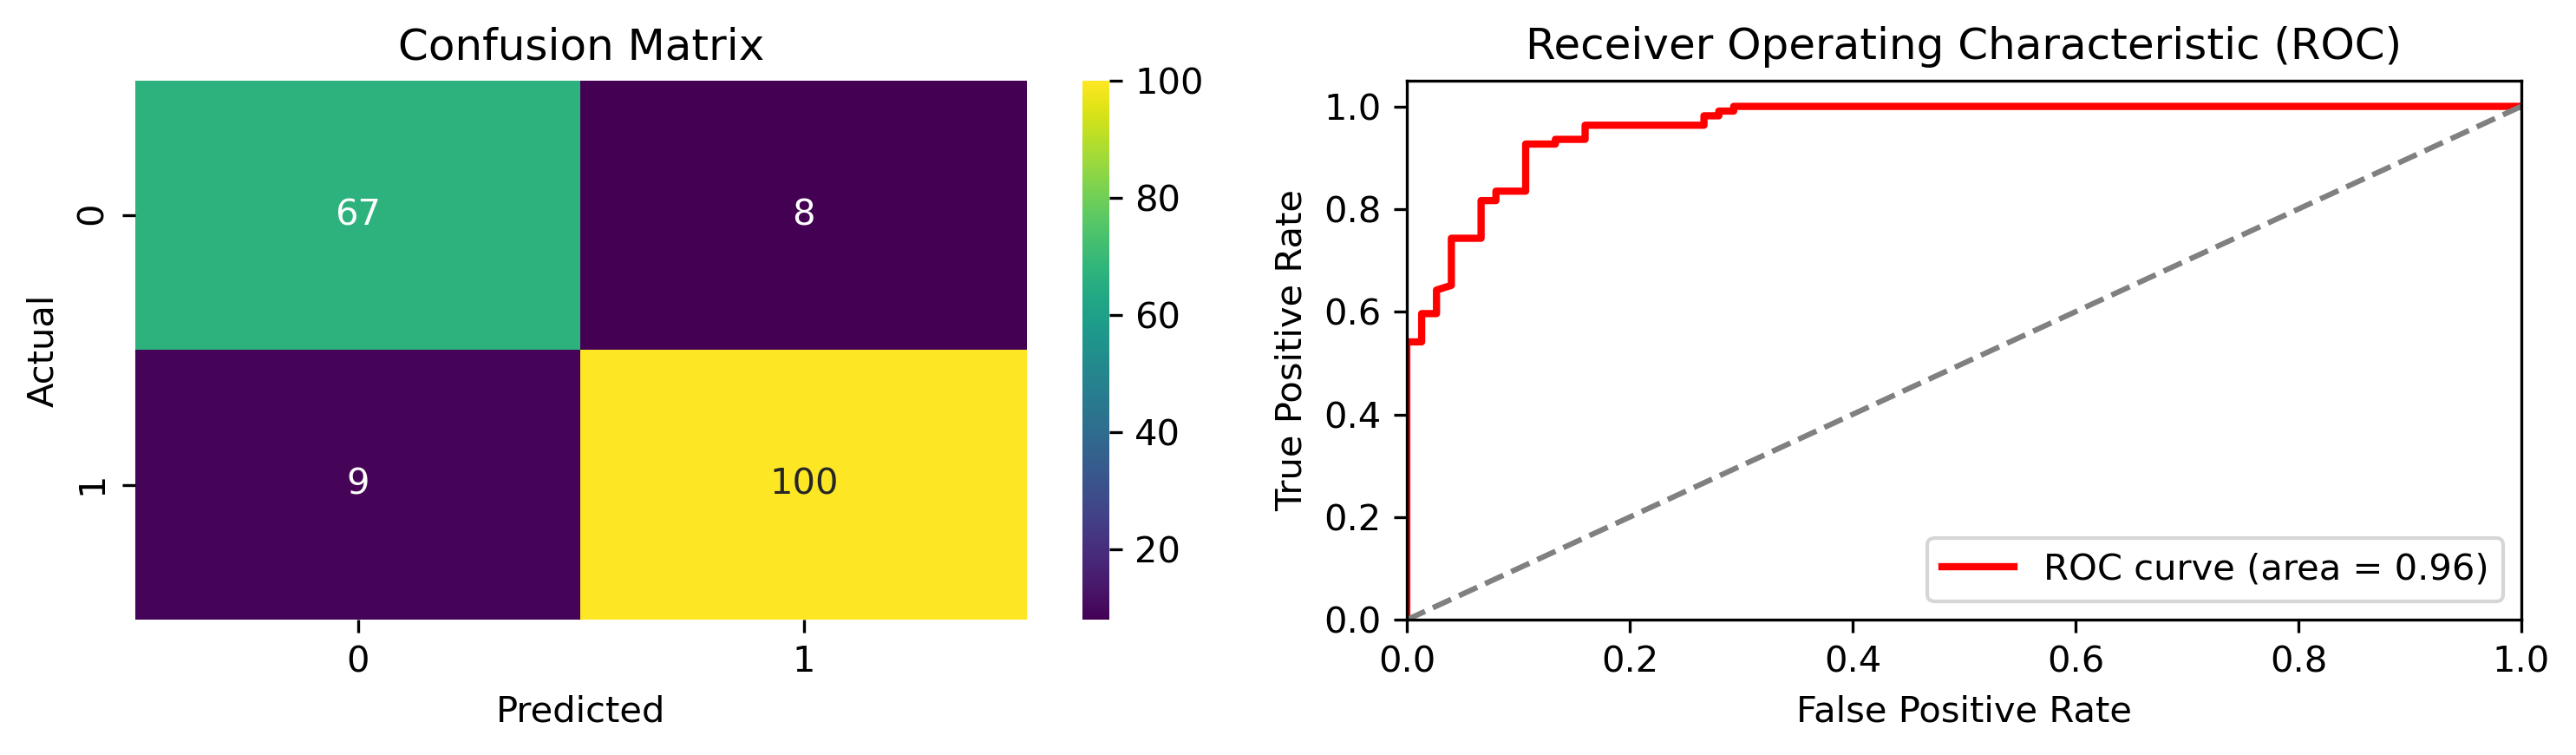

In [15]:
from sklearn.metrics import   roc_auc_score, roc_curve

# Predict probabilities and compute ROC-AUC
y_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

The notebook has predicted for the test set and will return the prediction later
